In [2]:
# importing libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import gc
import datetime

Problem Statement : 

Exploratory Data Analysis unlike other data analysis aims at developing a problem statement alongside the procedures of performing initial investigation 

of data so we will be looking at the same as we go along and representing data using different sorts of graphical representations and summary statistics, 

that help with this aforementioned objective of ours that we have laid out. To ensure it works out properly, we need to take into consideration a few assumptions.

Assumptions :

Requirement of stock clearance over the next financial year.

Financial year is defined as Jan-Dec.

Sales stay consistent as previously recorded.

Saturday is not a working day for the firm (according to the dataset).

Processes Undertaken :

Handling missing values (Cleaning, converting data into information, making it consumable for a layman)

Sampling (Head, tail, random)

Describing data (Base Statistics over individual parameters, summary)

Visualisation with the help of graphs


In [3]:
# libraries settings changes for proper representation
warnings.filterwarnings('ignore')
color = sns.color_palette()
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [4]:
# displaying the dataset
df=pd.read_csv('D:/data.csv', encoding = 'ISO-8859-1')
# displaying the top 5(default) values
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# displaying the bottom 5(default) values
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
# displaying a random record as a representative sample
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
163180,550541,22713,CARD I LOVE LONDON,1,4/19/2011 11:33,0.83,NaN,United Kingdom
331696,566025,21580,RABBIT DESIGN COTTON TOTE BAG,1,9/8/2011 12:55,2.25,17634.0,United Kingdom
184644,552702,22090,PAPER BUNTING RETROSPOT,9,5/10/2011 16:00,5.79,NaN,United Kingdom
217772,C555935,22431,WATERING CAN BLUE ELEPHANT,-6,6/8/2011 9:14,1.95,12567.0,France
110678,545693,20677,PINK POLKADOT BOWL,72,3/6/2011 14:09,1.06,16422.0,United Kingdom


In [7]:
# displaying the info of the current dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# renaming the fields for ease of further use
df.rename(index=str, columns={'InvoiceNo': 'invoice_num','StockCode' : 'stock_code','Description' : 'description','Quantity' : 'quantity','InvoiceDate' : 'invoice_date','UnitPrice' : 'unit_price','CustomerID' : 'cust_id','Country' : 'country'}, inplace=True)
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()
# dropping null values and cleaning the data
df_new = df.dropna()
df_new = df_new[df_new.quantity > 0]
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [9]:
# display how many such values were removed
df_new.isnull().sum().sort_values(ascending=False)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  object        
 1   stock_code    397924 non-null  object        
 2   description   397924 non-null  object        
 3   quantity      397924 non-null  int64         
 4   invoice_date  397924 non-null  datetime64[ns]
 5   unit_price    397924 non-null  float64       
 6   cust_id       397924 non-null  float64       
 7   country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [10]:
# generate count statistics of duplicate entries
if len(df_new[df_new.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df_new[df_new.duplicated()]))

No. of duplicated entries:  5192


In [11]:
# change columns type - String to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64',copy=True, errors = 'ignore')
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]
# splitting the date attribute
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  object        
 1   invoice_date  397924 non-null  datetime64[ns]
 2   year_month    397924 non-null  int64         
 3   month         397924 non-null  int64         
 4   day           397924 non-null  int64         
 5   hour          397924 non-null  int64         
 6   stock_code    397924 non-null  object        
 7   description   397924 non-null  object        
 8   quantity      397924 non-null  int64         
 9   unit_price    397924 non-null  float64       
 10  amount_spent  397924 non-null  float64       
 11  cust_id       397924 non-null  int64         
 12  country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 42.5+ MB


In [12]:
df_new.shape

(397924, 13)

In [13]:
# getting the data descibed by using basic statistical aspects
df_new.describe()

,year_month,month,day,hour,quantity,unit_price,amount_spent,cust_id
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,201101.038417,7.612537,3.614555,12.728247,13.021823,3.116174,22.394749,15294.315171
std,23.836517,3.416527,1.928274,2.273535,180.420210,22.096788,309.055588,1713.169877
min,201012.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,12346.000000
25%,201104.000000,5.000000,2.000000,11.000000,2.000000,1.250000,4.680000,13969.000000
50%,201107.000000,8.000000,3.000000,13.000000,6.000000,1.950000,11.800000,15159.000000
75%,201110.000000,11.000000,5.000000,14.000000,12.000000,3.750000,19.800000,16795.000000
max,201112.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,168469.600000,18287.000000


In [14]:
df_new.describe(include='object')

,invoice_num,stock_code,description,country
count,397924,397924,397924,397924
unique,18536,3665,3877,37
top,576339,85123A,white hanging heart t-light holder,United Kingdom
freq,542,2035,2028,354345


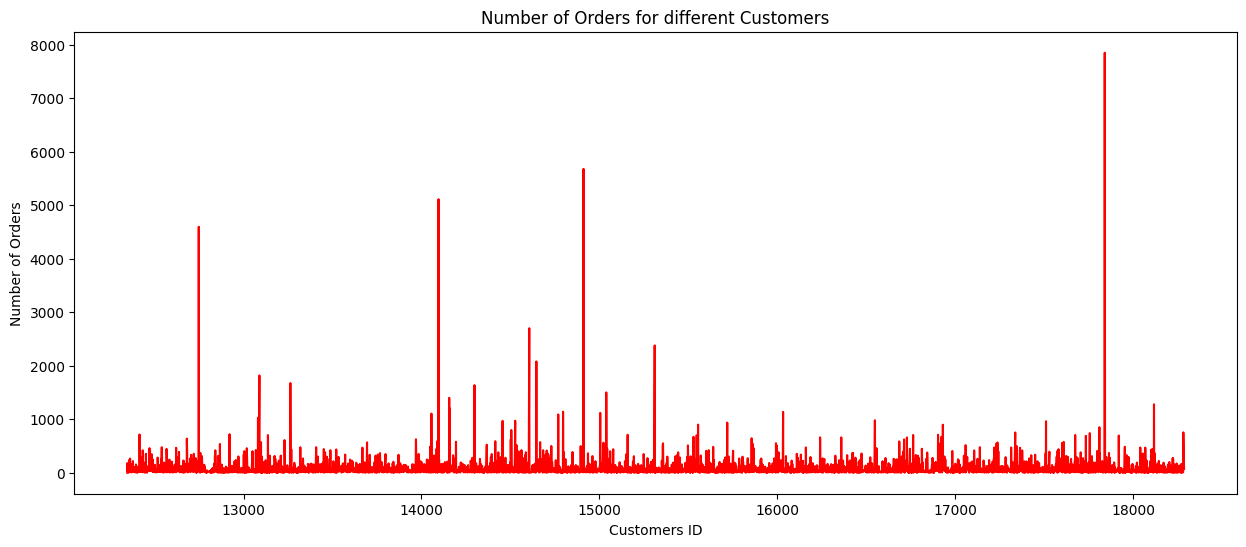

In [15]:
plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num,color='red')
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [16]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


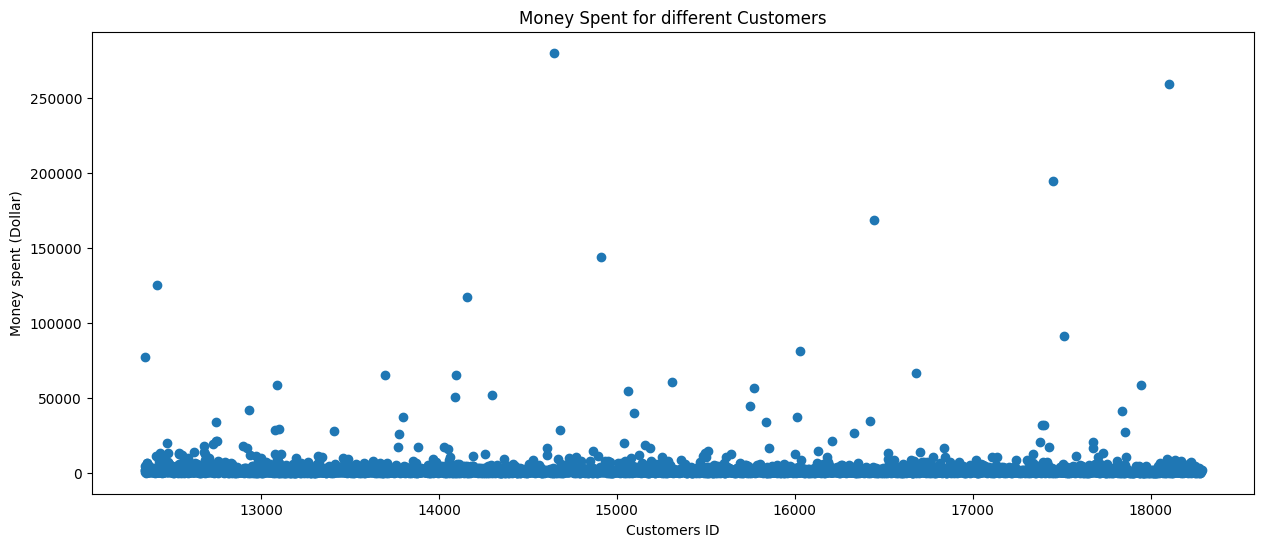

In [17]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()
plt.subplots(figsize=(15,6))
plt.scatter(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [18]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


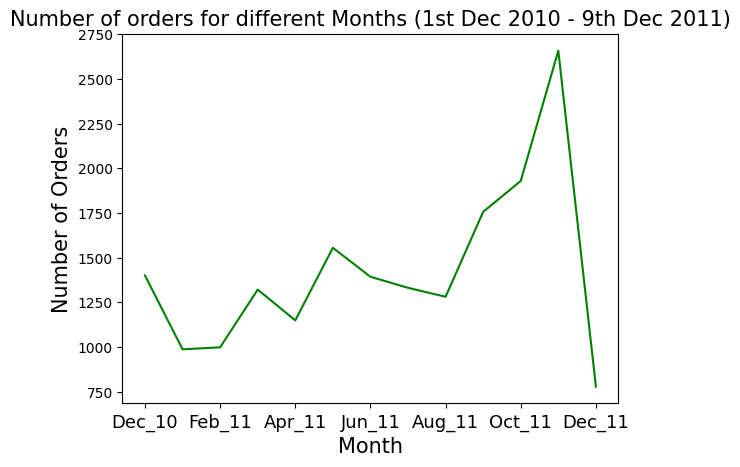

In [19]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(color='green')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('###','Dec_10','Feb_11','Apr_11','Jun_11','Aug_11','Oct_11','Dec_11',"##"), rotation='horizontal', fontsize=13)
plt.show()

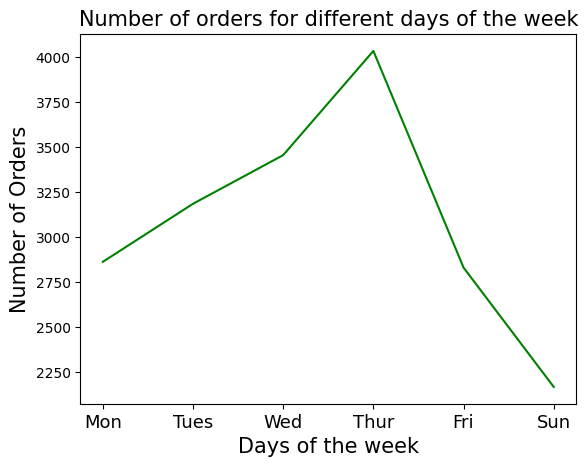

In [20]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(color='green')
ax.set_xlabel('Days of the week',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different days of the week',fontsize=15)
ax.set_xticklabels(('###','Mon','Tues','Wed','Thur','Fri','Sun','###',), rotation='horizontal', fontsize=13)
plt.show()

In [21]:
df_new['country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [22]:
df_new['hour'].value_counts()

12    72069
13    64031
14    54127
11    49092
15    45372
10    37999
16    24093
9     21945
17    13072
8      8691
19     3322
18     2929
20      802
7       379
6         1
Name: hour, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='Count'>

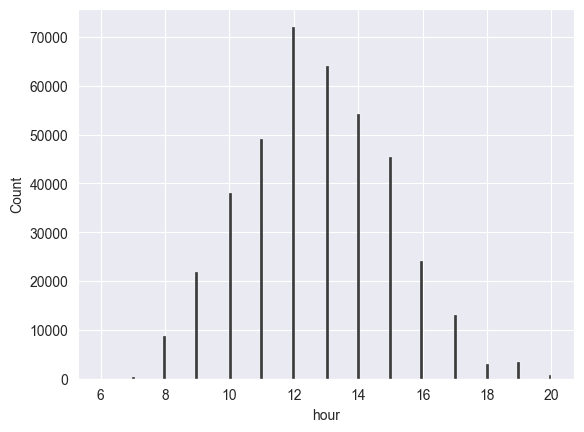

In [23]:
sns.set_style('darkgrid')
sns.color_palette("hls", 8)
sns.histplot(x=df_new['hour'],color='black')

<AxesSubplot:ylabel='Density'>

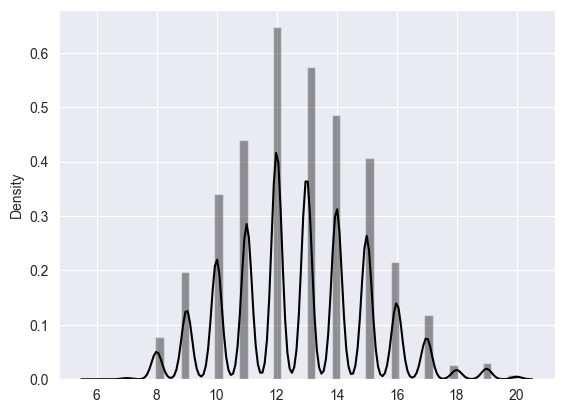

In [24]:
sns.set_style('darkgrid')
sns.color_palette("hls", 8)
sns.distplot(x=df_new['hour'],color='black')

In [25]:
df_new['day'].value_counts()

4    80052
3    68888
2    66476
1    64899
7    62775
5    54834
Name: day, dtype: int64

[Text(0.0, 0, '###'),
 Text(1.0, 0, 'Mon'),
 Text(2.0, 0, 'Tues'),
 Text(3.0, 0, 'Wednes'),
 Text(4.0, 0, 'Thurs'),
 Text(5.0, 0, 'Fri'),
 Text(6.0, 0, 'Satur'),
 Text(7.0, 0, 'Sun'),
 Text(8.0, 0, '')]

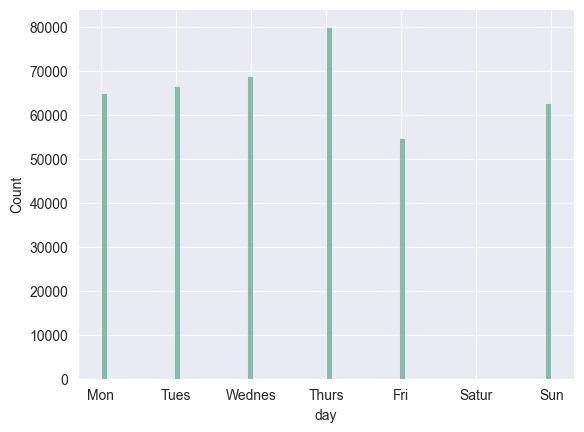

In [26]:
sns.set_style('darkgrid')
c=sns.set_palette(
    palette="crest",
    n_colors=3,
)
a=sns.histplot(df_new['day'],color=c)
a.set_xticklabels(('###','Mon','Tues','Wednes','Thurs','Fri','Satur','Sun'))

[Text(0.0, 0, '###'),
 Text(1.0, 0, 'Mon'),
 Text(2.0, 0, 'Tues'),
 Text(3.0, 0, 'Wednes'),
 Text(4.0, 0, 'Thurs'),
 Text(5.0, 0, 'Fri'),
 Text(6.0, 0, 'Satur'),
 Text(7.0, 0, 'Sun'),
 Text(8.0, 0, '')]

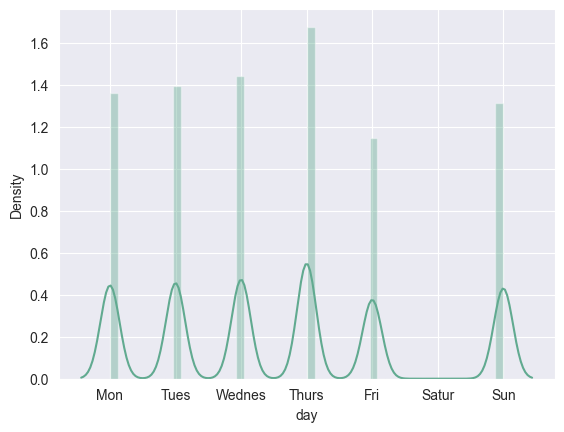

In [27]:
sns.set_style('darkgrid')
c=sns.set_palette(
    palette="crest",
    n_colors=3,
)
a=sns.distplot(df_new['day'],color=c)
a.set_xticklabels(('###','Mon','Tues','Wednes','Thurs','Fri','Satur','Sun'))

In [28]:
df_new['month'].value_counts()

11    64545
10    49557
12    43464
9     40030
5     28322
6     27185
3     27177
8     27013
7     26827
4     22644
1     21232
2     19928
Name: month, dtype: int64

[Text(0.0, 0, 'Dec'),
 Text(2.0, 0, 'Feb'),
 Text(4.0, 0, 'Apr'),
 Text(6.0, 0, 'Jun'),
 Text(8.0, 0, 'Aug'),
 Text(10.0, 0, 'Oct'),
 Text(12.0, 0, 'Dec'),
 Text(14.0, 0, '')]

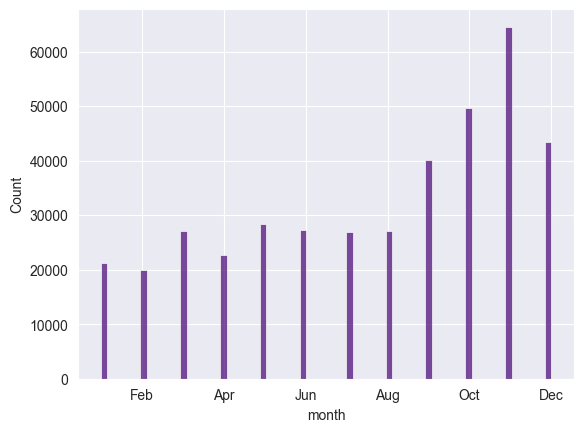

In [29]:
sns.set_style('darkgrid')
c=sns.set_palette(
    palette="magma",
    n_colors=3,
)
b=sns.histplot(df_new['month'],color=c)
b.set_xticklabels(('Dec','Feb','Apr','Jun','Aug','Oct','Dec'))

[Text(-2.0, 0, '###'),
 Text(0.0, 0, 'Dec'),
 Text(2.0, 0, 'Feb'),
 Text(4.0, 0, 'Apr'),
 Text(6.0, 0, 'Jun'),
 Text(8.0, 0, 'Aug'),
 Text(10.0, 0, 'Oct'),
 Text(12.0, 0, 'Dec'),
 Text(14.0, 0, '')]

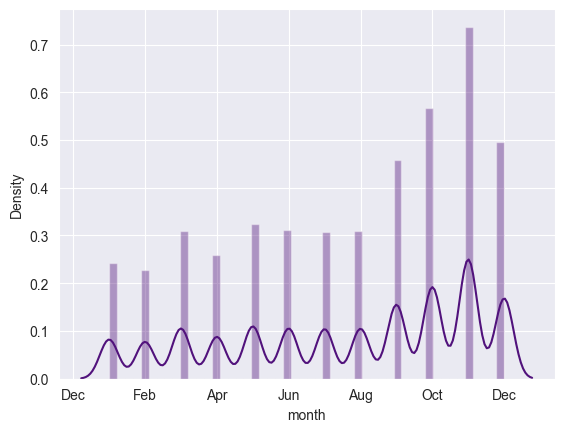

In [30]:
sns.set_style('darkgrid')
c=sns.set_palette(
    palette="magma",
    n_colors=3,
)
b=sns.distplot(df_new['month'],color=c)
b.set_xticklabels(('###','Dec','Feb','Apr','Jun','Aug','Oct','Dec'))

Conclusions :

If trends are to continue in a similar way and the financial year is considered to be taken from January until December, 

there should be an offer placed in November in order to clear out stocks and maximise profits before the financial year ends within the time-frame wherein people make the most purchases. 

This also generates a lot of revenue and since it is near the end of the considered financial year as well as the holiday season, 

can also lead to benefits not just to the firm but to the employees as well, since bonuses could be provided right before the holiday season and closing of the financial year, 

which will also lead to motivation amongst the employees. 
Since most sales, not just in November but all year around take place mostly in the middle of the week (Tuesday, Wednesday and Thursday), 

which is peculiar but this could be the part of a week wherein said offers can be placed. The time of these sales majorly happen in the hours of 

12:00 noon until 3:00 PM, thus this is where the exclusive offers with limited stock could be placed. 

Bibliography :

https://www.kaggle.com/code/admond1994/e-commerce-data-eda/data

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

https://www.ibm.com/cloud/learn/exploratory-data-analysis

https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607


Text(0.5, 1.0, 'Trends in Electricity Consumption')

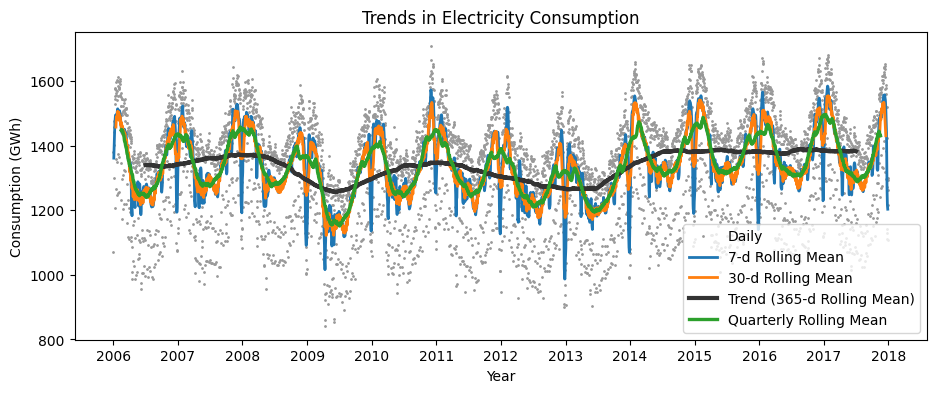

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")
data['Date']=pd.to_datetime(data['Date'])
data=data.set_index('Date')
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_monthly_max = data[data_columns].resample('M').max()
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_30d_rol=data[data_columns].rolling(window=30,center=True).mean()
data_90_rol=data[data_columns].rolling(window=90,center=True).mean()
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
ax.plot(data_7d_rol['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(data_30d_rol['Consumption'], linewidth=2, label='30-d Rolling Mean')
ax.plot(data_365d_rol['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
ax.plot(data_90_rol['Consumption'],linewidth=2.4,label='Quarterly Rolling Mean')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')